In [1]:
data_dir = "E:\\Final Project\\tempdata"


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np


In [3]:
labels = ['benign','malignant']
img_size = 224
def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append((resized_arr, class_num))  # Using tuple instead of list
            except Exception as e:
                print(e)
    return data


In [4]:
train = get_data('E:\\Final Project\\tempdata\\train')
val = get_data(r"E:\\Final Project\\tempdata\\validation")
test=get_data(r"E:\\Final Project\\check3\\test")

<Axes: xlabel='count'>

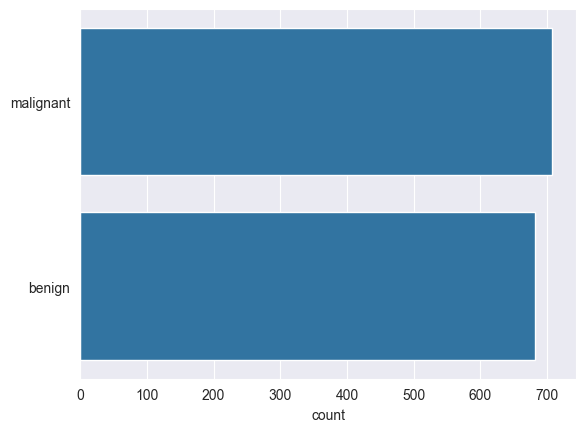

In [5]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("malignant")
    else:
        l.append("benign")
sns.set_style('darkgrid')
sns.countplot(l)

In [6]:
x_train = []
y_train = []
x_val = []
y_val = []
x_test = []
y_test = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

for feature, label in test:
  x_test.append(feature)
  y_test.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test=np.array(x_test)/255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)


In [7]:
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)
print("x_val:",x_val.shape)
print("y_val:",y_val.shape)

x_train: (1390, 224, 224, 3)
y_train: (1390,)
x_test: (412, 224, 224, 3)
y_test: (412,)
x_val: (276, 224, 224, 3)
y_val: (276,)


In [8]:
datagen = ImageDataGenerator(
       featurewise_center=False,
       samplewise_center=False,
       featurewise_std_normalization=False,
       samplewise_std_normalization=False,
       zca_whitening=False,
       rotation_range = 90,
       zoom_range = 0.5,
       width_shift_range=0.2,
       height_shift_range=0.2,
       horizontal_flip = True,

)

datagen.fit(x_train)
datagen.fit(x_val)
datagen.fit(x_test)


In [9]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization,Activation
convlayer=ResNet50V2(input_shape=(224,224,3),weights='imagenet',include_top=False)
for layer in convlayer.layers[:-10]:
    layer.trainable = False

In [10]:
model=Sequential()
model.add(convlayer)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(1024,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(512,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 dropout (Dropout)           (None, 7, 7, 2048)        0         
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 batch_normalization (Batch  (None, 100352)            401408    
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 1024)              102761472 
                                                                 
 batch_normalization_1 (Bat  (None, 1024)              4096      
 chNormalization)                                       

In [12]:

optimizer ='adam' 
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=25,batch_size=32,shuffle=True)


Epoch 1/25


44/44 [==============================] - 194s 3s/step - loss: 0.2938 - accuracy: 0.8971 - val_loss: 10.1860 - val_accuracy: 0.5942
Epoch 2/25
44/44 [==============================] - 163s 4s/step - loss: 0.1234 - accuracy: 0.9576 - val_loss: 8.3198 - val_accuracy: 0.5652
Epoch 3/25
44/44 [==============================] - 181s 4s/step - loss: 0.1050 - accuracy: 0.9705 - val_loss: 0.6760 - val_accuracy: 0.8877
Epoch 4/25
44/44 [==============================] - 174s 4s/step - loss: 0.0765 - accuracy: 0.9755 - val_loss: 0.1494 - val_accuracy: 0.9565
Epoch 5/25
44/44 [==============================] - 169s 4s/step - loss: 0.0903 - accuracy: 0.9712 - val_loss: 0.0480 - val_accuracy: 0.9746
Epoch 6/25
44/44 [==============================] - 165s 4s/step - loss: 0.0765 - accuracy: 0.9741 - val_loss: 0.0823 - val_accuracy: 0.9855
Epoch 7/25
44/44 [==============================] - 164s 4s/step - loss: 0.0310 - accuracy: 0.9899 - val_loss: 5.1866e-04 - val_accuracy: 1.0000
Epoch

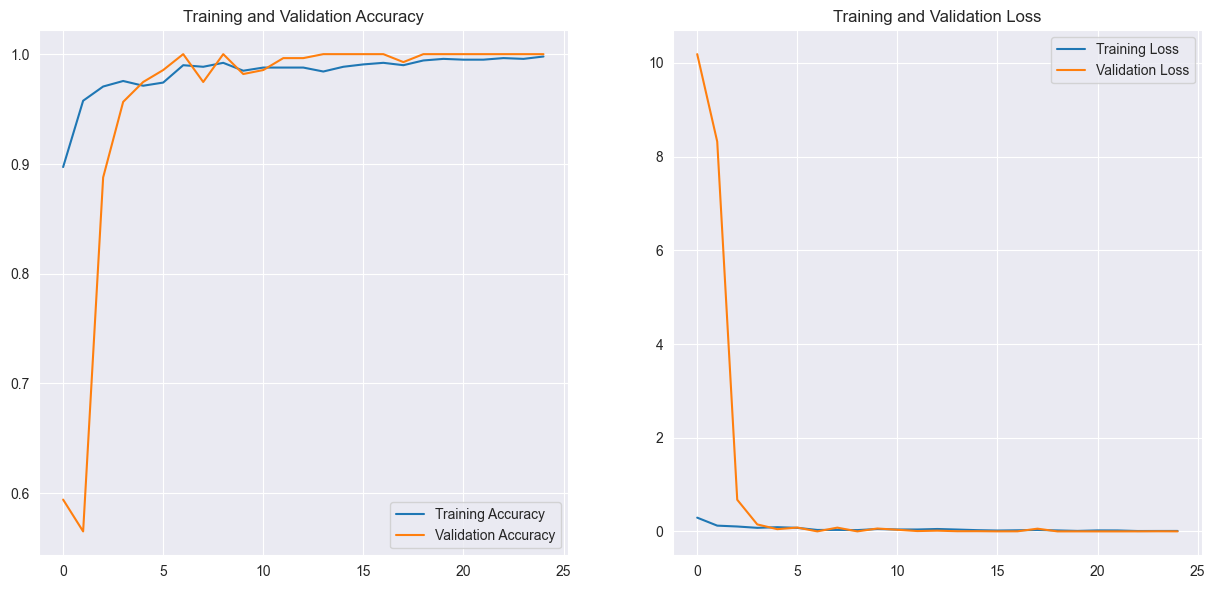

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [14]:
predictions = model.predict(x_test)
pred=np.argmax(predictions,axis=1)
pred = pred.reshape(1,-1)[0]
print(classification_report(y_test,pred, target_names = ['benign(Class 0)','malignant (Class 1)']))

13/13 [==============================] - 19s 1s/step
                     precision    recall  f1-score   support

    benign(Class 0)       0.99      0.90      0.94       242
malignant (Class 1)       0.88      0.99      0.93       170

           accuracy                           0.94       412
          macro avg       0.93      0.94      0.94       412
       weighted avg       0.94      0.94      0.94       412



In [15]:
accuracy = model.evaluate(x_test, y_test, batch_size=32)[1]
print("Accuracy:", accuracy)


13/13 [==============================] - 15s 1s/step - loss: 0.3091 - accuracy: 0.9369
Accuracy: 0.9368932247161865


In [16]:
#model.save("resnet50.h5")

E:\Final Project\my_venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
